# Import Modules

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization, LSTM
from tensorflow.keras.regularizers import l1
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_score,make_scorer,roc_auc_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
import warnings
warnings.filterwarnings("ignore")
import os
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from imblearn.over_sampling import ADASYN

# Data Preprocessing

In [142]:
df = pd.read_csv("creditcard.csv",nrows= 3000)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [29]:

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [30]:
miss = df.isnull().sum()
miss_percnt = (miss/len(df))*100
pd.concat([miss,miss_percnt], axis=1, keys=['Missing Values','Missing Percentage'])

,Missing Values,Missing Percentage
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


In [31]:
print('There are 492 frauds and the rest are genuine transactions in the dataset. \n1 represents fraud and 0 represents  Genuine')
df['Class'].value_counts()

There are 492 frauds and the rest are genuine transactions in the dataset. 
1 represents fraud and 0 represents  Genuine


0    284315
1       492
Name: Class, dtype: int64

# Data Visualization and Understanding

In [32]:
fraud = df[(df['Class'] != 0)]
normal = df[(df['Class'] == 0)]

In [33]:
trace = go.Pie(labels = ['Normal', 'Fraud'], values = df['Class'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of normal and fraud tansactions')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [34]:
timedelta = pd.to_timedelta(df['Time'], unit='s')

In [35]:
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

In [36]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,59,23
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,59,23
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,59,23
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,59,23
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,59,23


In [37]:
class_0 = df.loc[df['Class'] == 0]["Time_hour"]
class_1 = df.loc[df['Class'] == 1]["Time_hour"]

In [38]:
class_0.value_counts()

21    17687
18    17006
11    16803
20    16738
10    16590
14    16547
15    16435
16    16431
17    16137
9     15822
19    15630
22    15432
12    15403
13    15348
23    10917
8     10267
0      7689
7      7220
1      4210
6      4092
3      3475
2      3271
5      2979
4      2186
Name: Time_hour, dtype: int64

In [39]:
hist_data = [class_0, class_1]

In [40]:
group_labels = ['Not Fraud', 'Fraud']

In [41]:
colors = ['#333F44', '#37AA9C', '#94F3E4']

In [42]:
type(hist_data)

list

In [43]:
group_labels

['Not Fraud', 'Fraud']

In [44]:
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False, colors=colors)
fig['layout'].update(title='Credit Card Transactions Time/Hour Density Plot', xaxis=dict(title='Time [Hr]'))
py.iplot(fig, filename='dist_only_Hr')

In [45]:
class_0 = df.loc[df['Class'] == 0]["Time_min"]
class_1 = df.loc[df['Class'] == 1]["Time_min"]

In [46]:
hist_data = [class_0, class_1]

In [47]:
group_labels = ['Not Fraud', 'Fraud']

In [48]:
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time/Hour Density Plot', xaxis=dict(title='Time [Min]'))
py.iplot(fig, filename='dist_only_min')

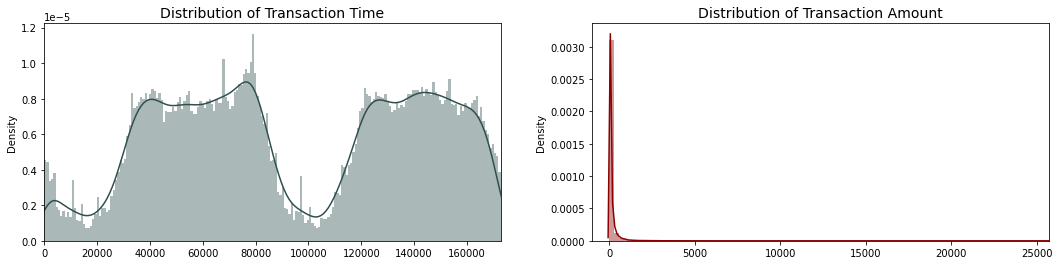

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(time_val, ax=ax[0], bins=200, color='darkslategray')
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(time_val), max(time_val)])

sns.distplot(amount_val, ax=ax[1], bins=85, color='darkred')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(amount_val - 1000), max(amount_val)])

plt.show()

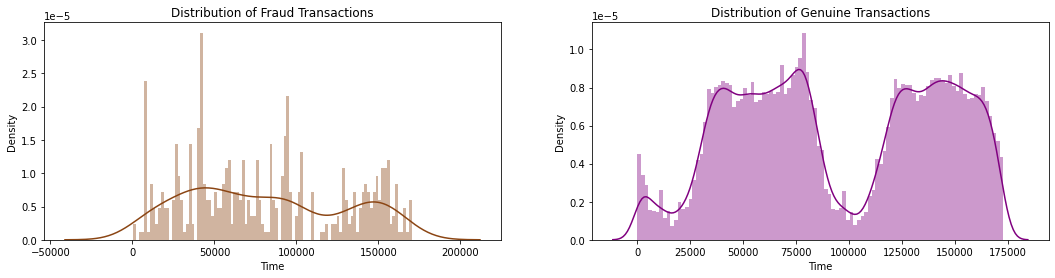

In [50]:
fig, axs = plt.subplots(ncols=2, figsize=(18,4))

sns.distplot(df[(df['Class'] == 1)]['Time'], bins=100, color='saddlebrown', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100, color='purple', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

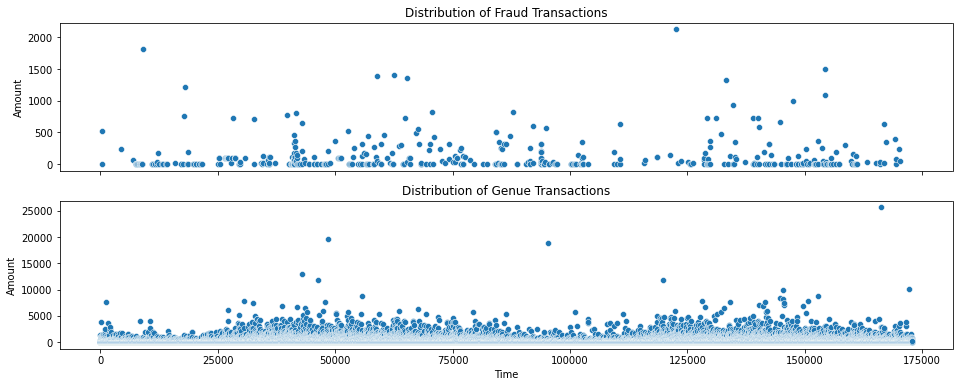

In [51]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==1], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==0], ax=axs[1])
axs[1].set_title("Distribution of Genue Transactions")

plt.show()

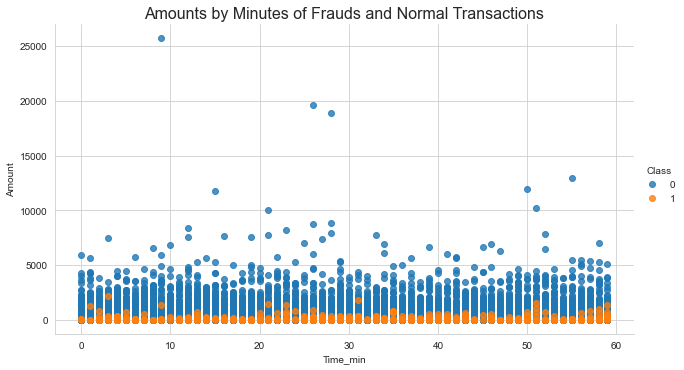

In [52]:
sns.set_style('whitegrid')
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

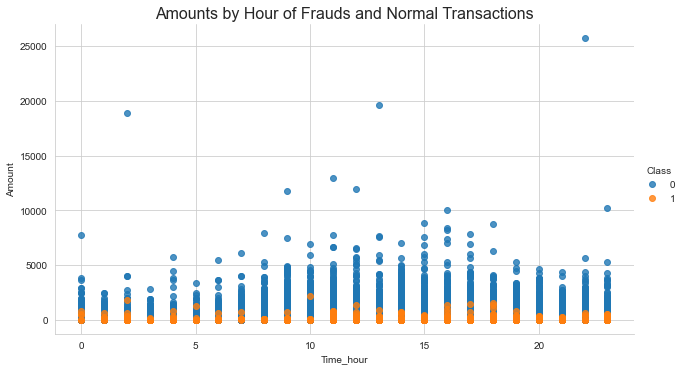

In [53]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)

plt.show()
df.drop(['Time_hour', 'Time_min'], axis=1, inplace=True)

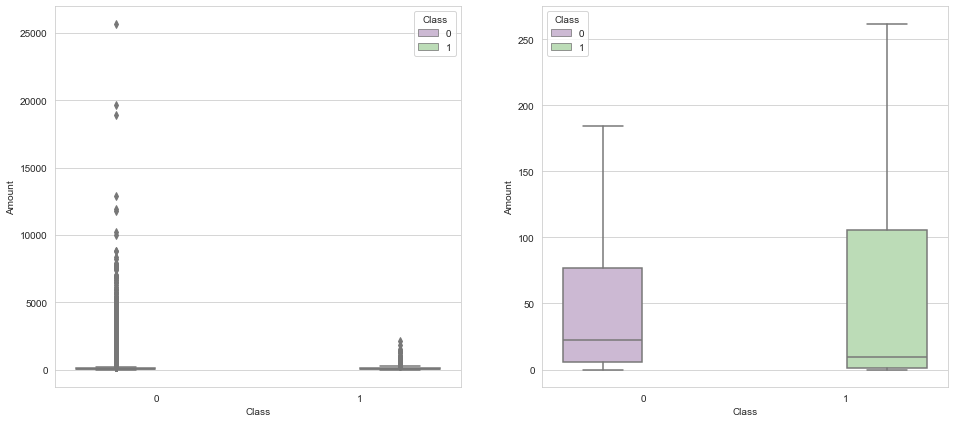

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,7))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [55]:
cols_names = df.drop(['Class', 'Amount', 'Time'], axis=1)
idx = 0

In [56]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

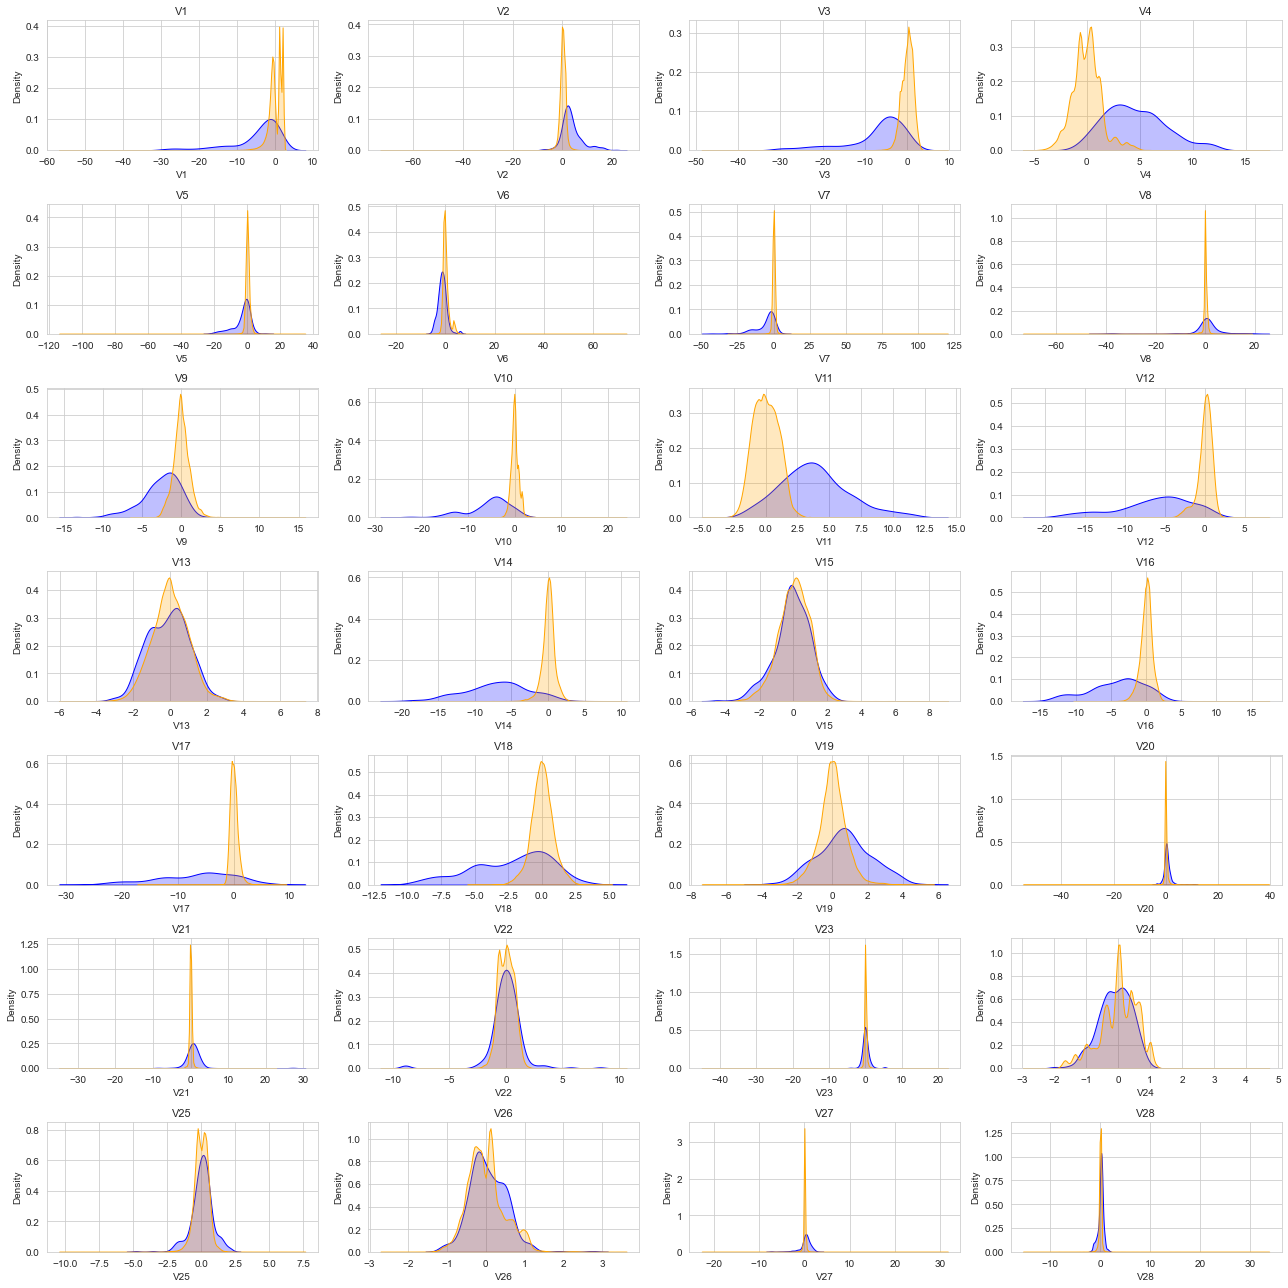

In [57]:
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

for col in cols_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(fraud[col], label="Normal", color='blue', shade=True)
    sns.kdeplot(normal[col], label="Fraud", color='orange', shade=True)
    plt.title(col, fontsize=11)
    plt.tight_layout()

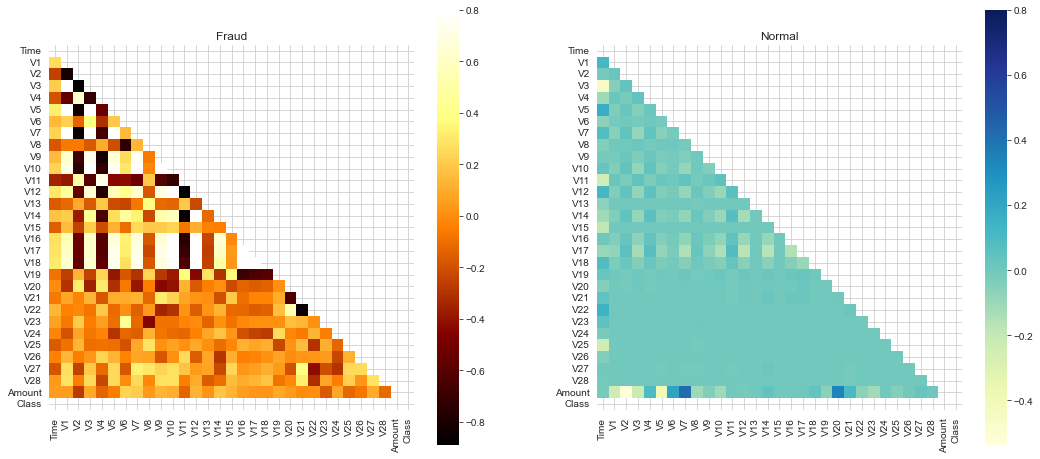

In [58]:
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 8))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((df.loc[df['Class'] ==1]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask);
ax1.set_title('Fraud')
sns.heatmap((df.loc[df['Class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask);
ax2.set_title('Normal')
plt.show()

# Scaleup and Split dataset

In [143]:
rob_scaler = RobustScaler()

In [144]:
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [145]:
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [146]:
X = df.drop('Class', axis=1)
y = df['Class']

In [147]:
target = ['Class']

In [148]:
feat_cols = ['scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount']

In [149]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [150]:
for train_index, test_index in sss.split(X, y):
    X_train_full, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_full, y_test = y.iloc[train_index], y.iloc[test_index]

In [151]:
sss2 = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

In [152]:
for train_idx, test_idx in sss2.split(X_train_full, y_train_full):
    X_train, X_valid = X_train_full.iloc[train_idx], X_train_full.iloc[test_idx]
    y_train, y_valid = y_train_full.iloc[train_idx], y_train_full.iloc[test_idx]

In [69]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (159491, 30)
y_train shape:  (159491,)
X_test shape:  (56962, 30)
y_test shape:  (56962,)


# Train Machine Learning Models without oversampling

## Model 1: Gaussian Naive Bayes

In [70]:
Model = GaussianNB()
Model.fit(X_train[feat_cols], y_train)
y_pred = Model.predict(X_test[feat_cols])

In [71]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.81      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.89      0.55     56962
weighted avg       1.00      0.98      0.99     56962

[[55578  1286]
 [   19    79]]


In [72]:
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9770899898177733


## Model 2: LightGBM

In [73]:


fit_params = {
             "eval_metric" : 'binary', 
             "eval_set" : [(X_test[feat_cols].values, y_test)],
             'eval_names': ['valid'],
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.001],
              'n_estimators' : [100],
              
             
              'min_child_weight': [1e-5],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.5),
              'reg_alpha': [ 10],
              'reg_lambda': [ 5]}

n_iter = 5 

lgbm_clf = lgb.LGBMClassifier(random_state=42, silent=True, metric='None', n_jobs=0)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=4, n_jobs=-1,
    refit=True,
    random_state=42)

grid_search.fit(X_train[feat_cols].values, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))

opt_parameters =  grid_search.best_params_

clf_sw = lgb.LGBMClassifier(**lgbm_clf.get_params())
#Optimal parameter
clf_sw.set_params(**opt_parameters)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 276, number of negative: 159215
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001731 -> initscore=-6.357610
[LightGBM] [Info] Start training from score -6.357610
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier(colsample_bytree=0.5872700594236813, learning_rate=0.001,
               metric='None', min_child_weight=1e-05, n_jobs=0, random_state=42,
               reg_alpha=10, reg_lambda=5, silent=True,
               subsample=0.960571445127933)

In [74]:
lgbm_clf = lgb.LGBMClassifier(colsample_bytree=0.6247240713084175, max_depth=6, metric='None',
               min_child_samples=206, min_child_weight=1, n_estimators=1000,
               n_jobs=4, num_leaves=44, random_state=42, reg_alpha=0.1,
               reg_lambda=1, subsample=0.27997993265440235)

lgbm_clf.fit(X_train, y_train)
lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)
y_score = lgbm_clf.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred.round()))

[LightGBM] [Info] Number of positive: 276, number of negative: 159215
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001731 -> initscore=-6.357610
[LightGBM] [Info] Start training from score -6.357610
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

## Model 3: RandomForestClassifier

In [75]:

clf = RandomForestClassifier(max_depth=5, min_samples_split=5,min_samples_leaf=4, random_state=42)
                            
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.65      0.75        98

    accuracy                           1.00     56962
   macro avg       0.94      0.83      0.88     56962
weighted avg       1.00      1.00      1.00     56962

[[56856     8]
 [   34    64]]
accuracy is 0.9992626663389628


## Model 4: CatBoost Classifier

In [78]:
Model=CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42,task_type='CPU') # task_type='GPU')
Model.fit(X_train[feat_cols],y_train,eval_set=(X_test[feat_cols],y_test))

Learning rate set to 0.110914
0:	learn: 0.9990846	test: 0.9989291	best: 0.9989291 (0)	total: 200ms	remaining: 3m 19s
1:	learn: 0.9982883	test: 0.9982971	best: 0.9989291 (0)	total: 318ms	remaining: 2m 38s
2:	learn: 0.9985642	test: 0.9985429	best: 0.9989291 (0)	total: 422ms	remaining: 2m 20s
3:	learn: 0.9990219	test: 0.9987711	best: 0.9989291 (0)	total: 515ms	remaining: 2m 8s
4:	learn: 0.9990595	test: 0.9988062	best: 0.9989291 (0)	total: 618ms	remaining: 2m 2s
5:	learn: 0.9992100	test: 0.9989116	best: 0.9989291 (0)	total: 689ms	remaining: 1m 54s
6:	learn: 0.9993291	test: 0.9990520	best: 0.9990520 (6)	total: 754ms	remaining: 1m 46s
7:	learn: 0.9994420	test: 0.9991222	best: 0.9991222 (7)	total: 809ms	remaining: 1m 40s
8:	learn: 0.9994608	test: 0.9992276	best: 0.9992276 (8)	total: 866ms	remaining: 1m 35s
9:	learn: 0.9994984	test: 0.9992451	best: 0.9992451 (9)	total: 942ms	remaining: 1m 33s
10:	learn: 0.9995486	test: 0.9992627	best: 0.9992627 (10)	total: 1s	remaining: 1m 30s
11:	learn: 0.999

In [79]:
y_pred=Model.predict(X_test[feat_cols])
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[56860    22]
 [    4    76]]
accuracy is  0.9995435553526912


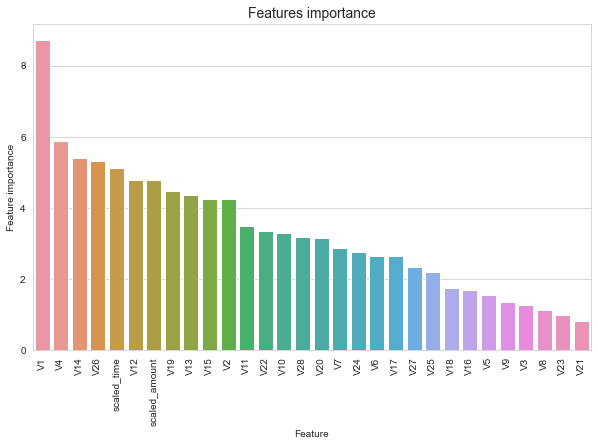

In [80]:
tmp = pd.DataFrame({'Feature': feat_cols, 'Feature importance': Model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,6))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

## Model 5: XGBoost Classifier

In [83]:
params = {
        'learning_rate': [0.001],
        'max_depth': [3],
        'min_child_weight': [1],
        'subsample': [0.5],
        'colsample_bytree': [0.5],
        'n_estimators' : [100],
        'objective': ['binary:logistic'],
    }

In [84]:
clf = xgb.XGBClassifier(random_state=42, tree_method='hist')#tree_method='gpu_hist')

In [85]:
model = GridSearchCV(estimator=clf, param_grid=params, cv=3, n_jobs=-1)

In [86]:
model.fit(X_train[feat_cols].values, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [87]:
y_pred=model.predict(X_test[feat_cols].values)

In [88]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.67      0.75        98

    accuracy                           1.00     56962
   macro avg       0.92      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962

[[56851    32]
 [   13    66]]
accuracy is  0.9992099996488887


# Train Machine Learning Models with Oversampling

## Adasyn Oversampler

In [153]:
ads = ADASYN( n_neighbors=1, random_state=42)

In [154]:
X_ads, y_ads = ads.fit_resample(X_train_full[feat_cols].values, y_train_full)

In [155]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [92]:
for train_index, test_index in sss.split(X_ads, y_ads):
    X_train_ads, X_valid_ads = X_ads[train_index], X_ads[test_index]
    y_train_ads, y_valid_ads = y_ads[train_index], y_ads[test_index]

## Model 1: Gaussian Naive Bayes

In [93]:
Model = GaussianNB()

In [94]:
Model.fit(X_train_ads, y_train_ads)

GaussianNB()

In [95]:
y_pred = Model.predict(X_test[feat_cols])

In [96]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.91      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962

[[54077  2787]
 [    9    89]]
accuracy is 0.9509146448509532


## Model 2: XGBoost Classifier

In [97]:
params = {
        'learning_rate': [0.001],
        'max_depth': [3],
        'min_child_weight': [1],
        'subsample': [0.5],
        'colsample_bytree': [0.5],
        'n_estimators' : [100],
        'objective': ['binary:logistic']
    }

In [98]:
clf = xgb.XGBClassifier(random_state=42, tree_method='hist') #tree_method='gpu_hist')

In [99]:
model = GridSearchCV(estimator=clf, param_grid=params, cv=3, n_jobs=-1)

In [100]:
model.fit(X_train_ads, y_train_ads)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [101]:
y_pred=model.predict(X_test[feat_cols].values)

In [102]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56864
           1       0.02      0.95      0.04        98

    accuracy                           0.93     56962
   macro avg       0.51      0.94      0.50     56962
weighted avg       1.00      0.93      0.96     56962

[[52696     5]
 [ 4168    93]]
accuracy is  0.9267406341069485


## Model 3: Random Forest Classifier

In [103]:
clf = RandomForestClassifier(max_depth=3, min_samples_split=4,min_samples_leaf=4, random_state=42)

In [104]:
clf.fit(X_train_ads, y_train_ads)

RandomForestClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=4,
                       random_state=42)

In [105]:
y_pred = clf.predict(X_test)

In [106]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.00      0.05      0.00        98

    accuracy                           0.95     56962
   macro avg       0.50      0.50      0.49     56962
weighted avg       1.00      0.95      0.97     56962

[[54249  2615]
 [   93     5]]
accuracy is 0.9524595344264597


## Model 4: LightGBM Classifier

In [125]:
fit_params = {# "early_stopping_rounds" : 50,
             "eval_metric" : 'binary', 
             "eval_set" : [(X_valid[feat_cols].values, y_valid)],
             'eval_names': ['valid'],
             # 'verbose': 0,
             'categorical_feature': 'auto'}

In [114]:
param_test = {'learning_rate' : [0.001],
              'n_estimators' : [100],
              
              'min_child_weight': [1e-5],
              
              'max_depth': [ 3],
              
              'reg_alpha': [0],
              'reg_lambda': [0]}

In [115]:
n_iter = 4

In [119]:
lgbm_clf = lgb.LGBMClassifier(random_state=42, silent=True, metric='None')

In [120]:
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    scoring='accuracy',
    cv=4, n_jobs=-1)

In [126]:
grid_search.fit(X_train_ads, y_train_ads, **fit_params)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 181947, number of negative: 181961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 363908, number of used features: 30
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499981 -> initscore=-0.000077
[LightGBM] [Info] Start training from score -0.000077


RandomizedSearchCV(cv=4,
                   estimator=LGBMClassifier(metric='None', random_state=42,
                                            silent=True),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001],
                                        'max_depth': [3],
                                        'min_child_weight': [1e-05],
                                        'n_estimators': [100], 'reg_alpha': [0],
                                        'reg_lambda': [0]},
                   scoring='accuracy')

In [127]:
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))

Best score reached: 0.8779004583576069 with params: {'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1e-05, 'max_depth': 3, 'learning_rate': 0.001} 


In [128]:
opt_parameters =  grid_search.best_params_

In [129]:
clf_sw = lgb.LGBMClassifier(**lgbm_clf.get_params())

In [130]:
clf_sw.set_params(**opt_parameters)

LGBMClassifier(learning_rate=0.001, max_depth=3, metric='None',
               min_child_weight=1e-05, random_state=42, reg_alpha=0,
               reg_lambda=0, silent=True)

In [131]:
lgbm_clf = lgb.LGBMClassifier(colsample_bytree=0.5339868613881635, learning_rate=0.05,
               max_depth=7, metric='None', min_child_weight=0.1,
               n_estimators=800, num_leaves=36, random_state=42, reg_alpha=0,
               reg_lambda=1, subsample=0.9901662910177844)

In [132]:
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 276, number of negative: 159215
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053951 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001731 -> initscore=-6.357610
[LightGBM] [Info] Start training from score -6.357610
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMClassifier(colsample_bytree=0.5339868613881635, learning_rate=0.05,
               max_depth=7, metric='None', min_child_weight=0.1,
               n_estimators=800, num_leaves=36, random_state=42, reg_alpha=0,
               reg_lambda=1, subsample=0.9901662910177844)

In [133]:
y_pred = lgbm_clf.predict(X_test)

In [134]:
y_score = lgbm_clf.predict_proba(X_test)[:,1]

In [135]:
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



## Model 5: CatBoost Classifer

In [138]:
Model=CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42, task_type='CPU' ) #task_type='GPU')

In [139]:
Model.fit(X_train_ads,y_train_ads,eval_set=(X_valid_ads,y_valid_ads))

Learning rate set to 0.13598
0:	learn: 0.8793541	test: 0.8783978	best: 0.8783978 (0)	total: 177ms	remaining: 2m 57s
1:	learn: 0.9217330	test: 0.9199578	best: 0.9199578 (1)	total: 367ms	remaining: 3m 3s
2:	learn: 0.9339119	test: 0.9325214	best: 0.9325214 (2)	total: 568ms	remaining: 3m 8s
3:	learn: 0.9408779	test: 0.9397430	best: 0.9397430 (3)	total: 716ms	remaining: 2m 58s
4:	learn: 0.9486161	test: 0.9473493	best: 0.9473493 (4)	total: 867ms	remaining: 2m 52s
5:	learn: 0.9549666	test: 0.9540213	best: 0.9540213 (5)	total: 1.01s	remaining: 2m 47s
6:	learn: 0.9630511	test: 0.9628697	best: 0.9628697 (6)	total: 1.18s	remaining: 2m 47s
7:	learn: 0.9659172	test: 0.9655847	best: 0.9655847 (7)	total: 1.34s	remaining: 2m 46s
8:	learn: 0.9694566	test: 0.9690691	best: 0.9690691 (8)	total: 1.51s	remaining: 2m 46s
9:	learn: 0.9738533	test: 0.9735867	best: 0.9735867 (9)	total: 1.7s	remaining: 2m 47s
10:	learn: 0.9773707	test: 0.9771920	best: 0.9771920 (10)	total: 1.85s	remaining: 2m 46s
11:	learn: 0.97

In [140]:
y_pred=Model.predict(X_test[feat_cols].values)

In [141]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.83      0.76        98

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962

[[56829    17]
 [   35    81]]
accuracy is  0.9990871107053826


# Train Deep Learning Model

In [156]:
X_train_d = np.expand_dims(X_train, -1)
X_test_d = np.expand_dims(X_test, -1)
X_valid_d = np.expand_dims(X_valid, -1)
y_valid_d = np.expand_dims(y_valid, -1)
y_train_d = np.expand_dims(y_train, -1)

In [157]:
model = Sequential()
model.add(Conv1D(32, 2, activation='selu', kernel_initializer="lecun_normal", input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='selu', kernel_initializer="lecun_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='selu', kernel_initializer="lecun_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='selu', kernel_initializer="lecun_normal"))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [158]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [159]:
optimizer = keras.optimizers.Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999)

In [160]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [161]:
m = model.fit(X_train_d, y_train, 
              validation_data=(X_valid_d, y_valid_d),
              batch_size=500, 
              epochs=20,
             )

Epoch 1/20
4/4 [==============================] - 6s 379ms/step - loss: 0.9932 - accuracy: 0.6244 - val_loss: 0.1785 - val_accuracy: 0.9458
Epoch 2/20
4/4 [==============================] - 1s 194ms/step - loss: 0.3767 - accuracy: 0.8470 - val_loss: 0.0897 - val_accuracy: 0.9778
Epoch 3/20
4/4 [==============================] - 1s 194ms/step - loss: 0.2152 - accuracy: 0.9190 - val_loss: 0.0613 - val_accuracy: 0.9833
Epoch 4/20
4/4 [==============================] - 1s 209ms/step - loss: 0.1323 - accuracy: 0.9500 - val_loss: 0.0495 - val_accuracy: 0.9847
Epoch 5/20
4/4 [==============================] - 1s 201ms/step - loss: 0.0930 - accuracy: 0.9702 - val_loss: 0.0443 - val_accuracy: 0.9917
Epoch 6/20
4/4 [==============================] - 1s 200ms/step - loss: 0.0775 - accuracy: 0.9702 - val_loss: 0.0387 - val_accuracy: 0.9944
Epoch 7/20
4/4 [==============================] - 1s 203ms/step - loss: 0.0596 - accuracy: 0.9780 - val_loss: 0.0366 - val_accuracy: 0.9958
Epoch 8/20
4/4 [====

In [162]:
score = model.evaluate(X_test_d, y_test)
print(score)

19/19 [==============================] - 0s 8ms/step - loss: 0.0185 - accuracy: 0.9950
[0.01854795031249523, 0.9950000047683716]


In [163]:
yhat_probs = model.predict(X_test_d, verbose=0)

In [164]:
yhat_probs = np.argmax(yhat_probs,axis=1)

In [165]:
precision = precision_score(y_test, yhat_probs)
print('\nPrecision: %f' % precision)
recall = recall_score(y_test, yhat_probs)
print('\nRecall: %f' % recall)


Precision: 0.000000

Recall: 0.000000


In [166]:
f1 = f1_score(y_test, yhat_probs)
print('\nF1 score: %f' % f1)


F1 score: 0.000000


In [167]:
print("_______________________________________________")
auc = accuracy_score(y_test, yhat_probs)
print('\nAccuracy: %f' % auc)

_______________________________________________

Accuracy: 1.000000


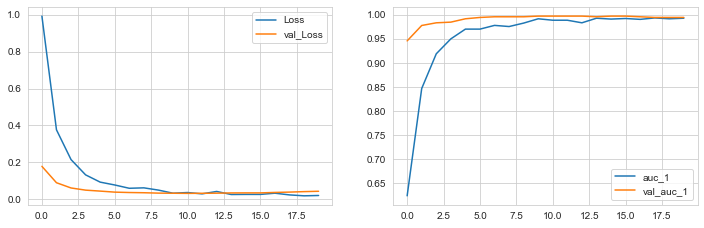

In [169]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(m.history['loss'], label='Loss')
plt.plot(m.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(m.history['accuracy'], label='auc_1')
plt.plot(m.history['val_accuracy'], label='val_auc_1')
plt.legend()

In [170]:
X_train_d.shape

(1680, 30, 1)

In [171]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(20, input_shape=(X_train_d[0].shape), kernel_initializer='lecun_uniform', activation='relu', kernel_regularizer=l1(0.1), recurrent_regularizer=l1(0.01), bias_regularizer=None, activity_regularizer=None, dropout=0.2, recurrent_dropout=0.2))#, return_sequences=True))
    model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
    return model

In [172]:
model = create_lstm_model()

In [173]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [174]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [175]:
m = model.fit(X_train_d, y_train, 
              validation_data=(X_valid_d, y_valid_d),
              batch_size=64, 
              epochs=30,
             )

Epoch 1/30
27/27 [==============================] - 7s 52ms/step - loss: 9.6538 - accuracy: 0.7667 - val_loss: 9.6469 - val_accuracy: 0.8833
Epoch 2/30
27/27 [==============================] - 1s 32ms/step - loss: 9.5200 - accuracy: 0.9244 - val_loss: 9.5219 - val_accuracy: 0.9486
Epoch 3/30
27/27 [==============================] - 1s 35ms/step - loss: 9.4517 - accuracy: 0.9631 - val_loss: 9.4335 - val_accuracy: 0.9611
Epoch 4/30
27/27 [==============================] - 1s 28ms/step - loss: 9.3479 - accuracy: 0.9762 - val_loss: 9.3700 - val_accuracy: 0.9681
Epoch 5/30
27/27 [==============================] - 1s 30ms/step - loss: 9.3225 - accuracy: 0.9792 - val_loss: 9.3160 - val_accuracy: 0.9736
Epoch 6/30
27/27 [==============================] - 1s 28ms/step - loss: 9.2450 - accuracy: 0.9869 - val_loss: 9.2708 - val_accuracy: 0.9833
Epoch 7/30
27/27 [==============================] - 1s 28ms/step - loss: 9.2033 - accuracy: 0.9911 - val_loss: 9.2067 - val_accuracy: 0.9917
Epoch 8/30
27

In [176]:
score = model.evaluate(X_test_d, y_test)
print(score)

19/19 [==============================] - 0s 6ms/step - loss: 8.4005 - accuracy: 1.0000
[8.400487899780273, 1.0]


In [177]:
yhat_probs = model.predict(X_test_d, verbose=0)

In [178]:
yhat_probs = np.argmax(yhat_probs,axis=1)

In [179]:
precision = precision_score(y_test, yhat_probs)
print('\nPrecision: %f' % precision)
recall = recall_score(y_test, yhat_probs)
print('\nRecall: %f' % recall)


Precision: 0.000000

Recall: 0.000000


In [180]:
print("_______________________________________________")
auc = accuracy_score(y_test, yhat_probs)
print('\nAccuracy: %f' % auc)

_______________________________________________

Accuracy: 1.000000


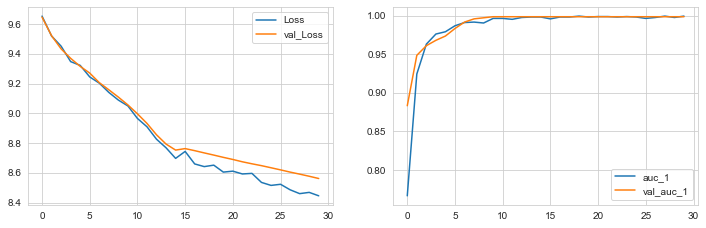

In [182]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(m.history['loss'], label='Loss')
plt.plot(m.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(m.history['accuracy'], label='auc_1')
plt.plot(m.history['val_accuracy'], label='val_auc_1')
plt.legend()